Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Multivarijatna analiza podataka - ak. god. 2022/2023  
http://www.fer.unizg.hr/predmet/map

### Prva laboratorijska vježba - Geometrija uzorka, multivarijatna normalna razdioba, statističko zaključivanje

**Rok za predaju: 2. travnja 2023. u 23:59h**

------------------------------

### Uvod i upute za predaju

Rješavanje vježbe svodi se na čitanje uputa u ćelijama s tekstom, nadopunjavanje blokova kôda (možete dodavati i dodatne blokove kôda ukoliko je potrebno) i ispisivanje rezultata (u vidu ispisa iz funkcija, tablica i grafova). Vježbu radite samostalno, a svoje rješenje branite na terminima koji su vam dodijeljeni u kalendaru. **Pritom morate razumjeti teorijske osnove implementiranih rješenja, u okviru onoga što je obrađeno na predavanjima, te morate pokazati da razumijete sav kôd koji ste napisali.** Zadatci u samoj vježbi su istraživačkog tipa - ne postoji nužno samo jedan točan način rješavanja svakog zadatka, zato potičemo studente na eksperimentiranje.

Kôd možete pisati u Python ili R programskim jezicima. Ukoliko želite koristiti R, potrebno je instalirati određeni paket prema [ovim jednostavnim uputama](https://datatofish.com/r-jupyter-notebook/), i zatim odabrati R kernel u gornjem desnom kutu. **Osim ako u određenom zadatku ne piše drugačije, za implementaciju rješenja možete koristiti proizvoljne biblioteke.**

**Vaše rješenje potrebno je predati u sustav _Moodle_ u obliku .ipynb datoteke naziva IME_PREZIME_JMBAG.ipynb.** Podsjećamo da bodovi iz laboratorijskih vježbi ulaze i u bodove na ispitnom roku, te da je za polaganje predmeta potrebno imati barem 50% ukupnih bodova iz laboratorijskih vježbi. **Nadoknade laboratorijskih vježbi neće biti organizirane.** Za sva dodatna pitanja svakako se javite na email adresu predmeta: _map@fer.hr_.

------------------------------

In [136]:
# Fiksirajte "seed" kako bi ispravno rekonstruirali i verificali eksperimente
# <Vaš kôd ovdje>
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
import scipy.stats as stats
import pandas as pd

random.seed(42)
np.random.seed(42)

### 1. Geometrija uzorka i slučajno uzorkovanje

Neka je dan idući uzorak s $n = 4$ opservacije i $p = 3$ varijabli:

$$
\mathbf{X} = 
\begin{bmatrix}
10 & 3 & 2 \\
7 & 2 & 6 \\
8 & 1 & 3 \\ 
7 & 1 & 4  
\end{bmatrix}
$$

#### (a) 

Izračunajte i ispišite uzorački vektor srednjih vrijednosti $\overline{\mathbf{x}}$, uzoračku matricu kovarijance $\mathbf{S}$ i uzoračku matricu korelacije $\mathbf{R}$. 

In [16]:
# <Vaš kôd ovdje>

X = np.array([
    [10, 3, 2],
    [7, 2, 6],
    [8, 1, 3],
    [7, 1, 4]
])

X_mean = X.mean(axis=0)
print("uzorački vektor srednjih vrijednosti X\n", X_mean)

S = np.cov(X.T).round(2)
print("\nuzoračka matrica kovarijance S\n", S)

R = np.corrcoef(X.T).round(2)
print("\nuzoračka matrica korelacije R\n", R)

uzorački vektor srednjih vrijednosti X
 [8.   1.75 3.75]

uzoračka matrica kovarijance S
 [[ 2.    1.   -2.  ]
 [ 1.    0.92 -0.42]
 [-2.   -0.42  2.92]]

uzoračka matrica korelacije R
 [[ 1.    0.74 -0.83]
 [ 0.74  1.   -0.25]
 [-0.83 -0.25  1.  ]]


Vizualizirajte graf raspršenja između prve i druge varijable, zatim prve i treće varijable. Usporedite grafove sa vrijednostima kovarijance i korelacije između tih varijabli.

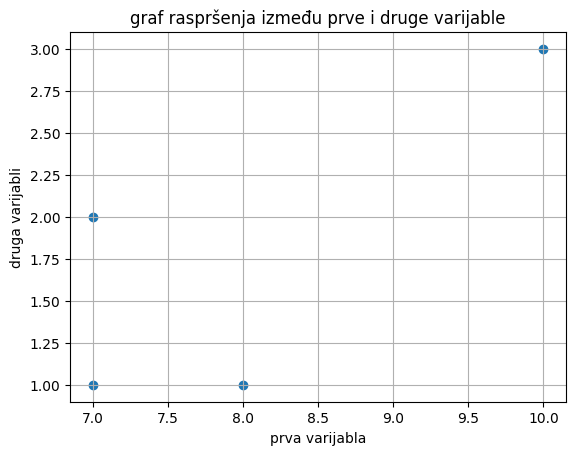

In [17]:
# <Vaš kôd ovdje>
plt.scatter(X[:, 0], X[:, 1])
plt.title('graf raspršenja između prve i druge varijable')
plt.xlabel('prva varijabla')
plt.ylabel('druga varijabli')
plt.grid()
plt.show()

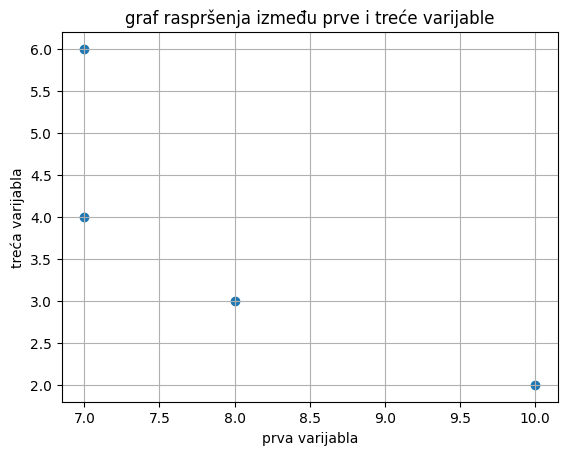

In [18]:
# <Vaš kôd ovdje>
plt.scatter(X[:, 0], X[:, 2])
plt.title('graf raspršenja između prve i treće varijable')
plt.xlabel('prva varijabla')
plt.ylabel('treća varijabla')
plt.grid()
plt.show()

 Izračunajte statističku udaljenost:
 
 $$
 d\,(\mathbf{x}_1, \mathbf{x}_2) = ((\mathbf{x}_1 - \mathbf{x}_2)^\intercal \, \mathbf{S}^{-1} (\mathbf{x}_1 - \mathbf{x}_2)
 $$
  
 između prve i zadnje opservacije $d\,(\mathbf{x}_1, \mathbf{x}_4)$. Usporedite ju s euklidskom udaljenošću.

In [92]:
# <Vaš kôd ovdje>
X1 = X[0, :]
X2 = X[3, :]

print(X1)
print(X2)

S = np.cov(X.T)
S_inv = np.linalg.inv(S)
d = np.dot(np.dot((X1 - X2).T, S_inv), (X1 - X2))
print("\nstatistička udaljenost:\n", d)

euclid = np.sqrt(np.sum((X1 - X2)**2))
print("\neuklidska udaljenost:\n", euclid)

[10  3  2]
[7 1 4]

statistička udaljenost:
 6.000000000000028

euklidska udaljenost:
 4.123105625617661


#### (b) 
Neka $\mathbf{x}_i \in \mathbb{R}^{n \times 1}$ predstavlja vektor vrijednosti varijable $i$  (iz uzorka $\mathbf{X}$), a $\overline{x}_i$ predstavlja uzoračku srednju vrijednost varijable $i$. Za svaku varijablu $i$, izračunajte vektor devijacija (reziduala) $\mathbf{d}_i = \mathbf{x}_i - \overline{x}_i \mathbf{1}$. Usporedite duljinu vektora devijacija sa standardnom devijacijom varijable.

In [38]:
# <Vaš kôd ovdje>

d = X - X_mean
print("\nvektor devijacija (reziduala) d:\n", d)

d_length = np.sqrt(np.sum(d**2, axis=0))
print("\nduljinu vektora devijacija:\n", d_length)

std = np.std(X, axis=0)
print("\nstandardnom devijacijom varijable:\n", std)


vektor devijacija (reziduala) d:
 [[ 2.    1.25 -1.75]
 [-1.    0.25  2.25]
 [ 0.   -0.75 -0.75]
 [-1.   -0.75  0.25]]

duljinu vektora devijacija:
 [2.44948974 1.6583124  2.95803989]

standardnom devijacijom varijable:
 [1.22474487 0.8291562  1.47901995]


Generirajte $M = 1000$ realizacija slučajnog vektora dimenzije $4 \times 1$, gdje je svaka varijabla vektora iz diskretne uniformne razdiobe $\mathcal{U}\{0,10\}$. Za svaku varijablu izračunajte standardnu devijaciju i duljinu vektora devijacija. Na grafu prikažite standardnu devijaciju kao funkciju u ovisnosti o duljini vektora devijacija.

In [62]:
# <Vaš kôd ovdje>
M = np.random.randint(0, 11, size=(1000, 4))

std = np.std(M, axis=0)
print("\nstandardna devijacija:\n", std)

d = M - M.mean(axis=0)
d_length = np.sqrt(np.sum(d**2, axis=0))
print("\nduljinu vektora devijacija:\n", d_length)


standardna devijacija:
 [3.18010755 3.12861055 3.15439947 3.13464113]

duljinu vektora devijacija:
 [100.56383048  98.93535263  99.75086967  99.12605611]


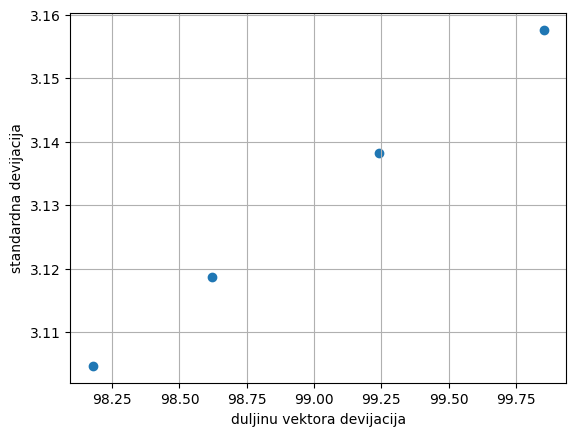

In [51]:
plt.scatter(d_length, std)
plt.xlabel('duljinu vektora devijacija')
plt.ylabel('standardna devijacija')
plt.grid()
plt.show()

#### (c) 
Preko izračunatih vektora devijacija $\mathbf{d}_i$ rekonstruirajte matricu kovarijance $\mathbf{S}$, a zatim i matricu korelacije $\mathbf{R}$. Dokažite da su rekonstruirane matrice jednake gore izračunatima.

In [68]:
# <Vaš kôd ovdje>
S_recons = np.cov(d.T)
S = np.cov(M.T)
print(np.allclose(S, S_recons))

R_recons = np.corrcoef(d.T)
R = np.corrcoef(M.T)
print(np.allclose(R, R_recons))

True
True


#### (d) 
Izračunajte uzoračku generaliziranu varijancu $|\mathbf{S}|$ uzorka $\mathbf{X}$. Zatim dodajte novu varijablu koja je linearna kombinacija prve i druge varijable $\mathbf{x}_3 = \mathbf{x}_0 + \mathbf{x}_1$. Izračunajte uzoračku generaliziranu varijancu na novom uzorku.

In [86]:
# <Vaš kôd ovdje>
print("\nX:\n", X)

S = np.cov(X.T)
S_det = np.linalg.det(S)
print("\n|S|:\n", S_det.round(2))


X3 = X[:, 0] + X[:, 1]
X_expand = np.hstack((X, X3.reshape(-1, 1)))
print("\nX prosireno:\n", X_expand)

S = np.cov(X_expand.T)
S_det = np.linalg.det(S)
print("\n|S|:\n", S_det.round(2))  # det = 0 za linearno zavisnu varijablu


X:
 [[10  3  2]
 [ 7  2  6]
 [ 8  1  3]
 [ 7  1  4]]

|S|:
 0.08

X prosireno:
 [[10  3  2 13]
 [ 7  2  6  9]
 [ 8  1  3  9]
 [ 7  1  4  8]]

|S|:
 -0.0


Maknite zadnju opservaciju iz originalnog uzorka $\mathbf{X}$. Izračunajte uzoračku generaliziranu varijancu i svojstvene vektore na novom uzorku. Što možete zaključiti iz ovog i prethodnog primjera?

In [95]:
# <Vaš kôd ovdje>
X_drop = X[:-1,:]
print("\nX bez zadnje opservacije:\n", X_drop)

S = np.cov(X.T)
S_det = np.linalg.det(S)
print("\n|S|:\n", S_det.round(2))

eig_vals, eig_vecs = np.linalg.eig(S)
print("\nsvojstveni vektori:\n", eig_vecs)


X bez zadnje opservacije:
 [[10  3  2]
 [ 7  2  6]
 [ 8  1  3]]

|S|:
 0.08

svojstveni vektori:
 [[-0.62699232 -0.69987874  0.34212628]
 [-0.24403505  0.59352292  0.76692727]
 [ 0.73981588 -0.3973667   0.54292925]]


### 2. Multivarijatna normalna razdioba

Generirajte uzorak $\mathbf{X} \in \mathbb{R}^{1000x2}$ iz multivarijatne normalne razdiobe određene parametrima:

$$
\mathbf{\mu} = [2, 3],
\mathbf{\Sigma} = 
\begin{bmatrix}
10^2 & 6^2 \\
6^2 & 6^2 \\
\end{bmatrix}
$$

In [192]:
# <Vaš kôd ovdje>

mu = np.array([2, 3])
cov_matrix = np.array([[10**2, 6**2], [6**2, 6**2]])

X = np.random.multivariate_normal(mu, cov_matrix, size=1000)

#### (a) 

Prikažite graf raspršenja dviju varijabli. Na istom grafu prikažite gustoću razdiobe uz pomoć elipsi za nekoliko različitih veličina $c^2$, gdje su točke $\mathbf{x}$ sve točke koje imaju jednaku udaljenost $c^2$ od središta $\mathbf{\mu}$:

$$
c^2 =(\mathbf{x} - \mathbf{\mu})^\intercal \mathbf{\Sigma}^{-1} (\mathbf{x} - \mathbf{\mu})
$$
Pripazite da osi grafa budu na istoj skali.

**Hint**: Pogledajte `contour` funkciju u R-u, ili `plt.contour` funkciju u Pythonu (`matplotlib` biblioteka)

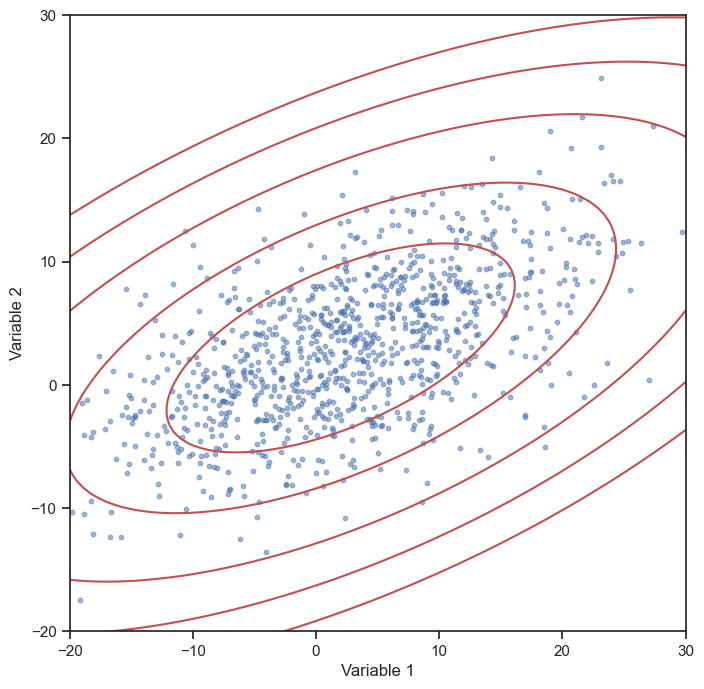

In [194]:
# <Vaš kôd ovdje>

# Set up plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.set_xlim([-20, 30])
ax.set_ylim([-20, 30])
ax.set_xlabel('Variable 1')
ax.set_ylabel('Variable 2')

# Plot scatter plot of the data
ax.scatter(X[:, 0], X[:, 1], s=10, alpha=0.5)

# Plot ellipses for different values of c2
for c2 in [2, 5, 10, 15, 20]:
    inv_cov = np.linalg.inv(cov_matrix)
    x, y = np.meshgrid(np.linspace(-20, 30, 100), np.linspace(-20, 30, 100))
    z = np.empty_like(x)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            d = np.array([x[i, j], y[i, j]]) - mu
            z[i, j] = d @ inv_cov @ d.T
    ax.contour(x, y, z, levels=[c2], colors='r')

plt.show()

#### (b)

Prikažite tri grafa raspršenja i pripadajućih elipsi uzorkovanjem iz multivarijatne normalne razdiobe s istim $\mu$ iz prošlog podzadatka i različitim matricama kovarijanci:

$$
\mathbf{\Sigma_1} = 
\begin{bmatrix}
10^2 & 6^2 \\
6^2 & 10^2 \\
\end{bmatrix},
\mathbf{\Sigma_2} = 
\begin{bmatrix}
10^2 & 7^2 \\
7^2 & 6^2 \\
\end{bmatrix}
\mathbf{\Sigma_3} = 
\begin{bmatrix}
10^2 & 8^2 \\
8^2 & 6^2 \\
\end{bmatrix}
$$
Ukoliko nije moguće prikazati grafove raspršenja, pokažite zašto.

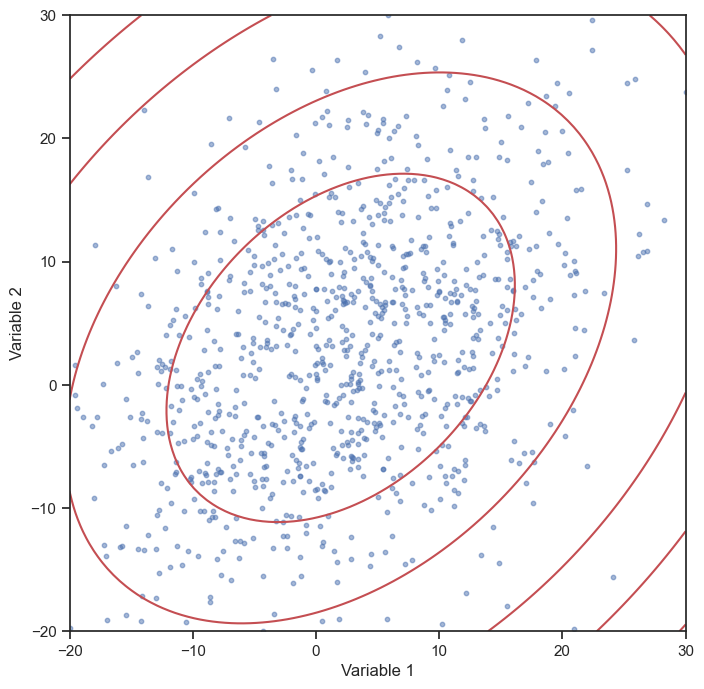

In [195]:
# <Vaš kôd ovdje>

mu = np.array([2, 3])
cov_matrix = np.array([
    [10**2, 6**2], 
    [6**2, 10**2]
])

X = np.random.multivariate_normal(mu, cov_matrix, size=1000)

# Set up plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.set_xlim([-20, 30])
ax.set_ylim([-20, 30])
ax.set_xlabel('Variable 1')
ax.set_ylabel('Variable 2')

# Plot scatter plot of the data
ax.scatter(X[:, 0], X[:, 1], s=10, alpha=0.5)

# Plot ellipses for different values of c2
for c2 in [2, 5, 10, 15, 20]:
    inv_cov = np.linalg.inv(cov_matrix)
    x, y = np.meshgrid(np.linspace(-20, 30, 100), np.linspace(-20, 30, 100))
    z = np.empty_like(x)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            d = np.array([x[i, j], y[i, j]]) - mu
            z[i, j] = d @ inv_cov @ d.T
    ax.contour(x, y, z, levels=[c2], colors='r')

plt.show()

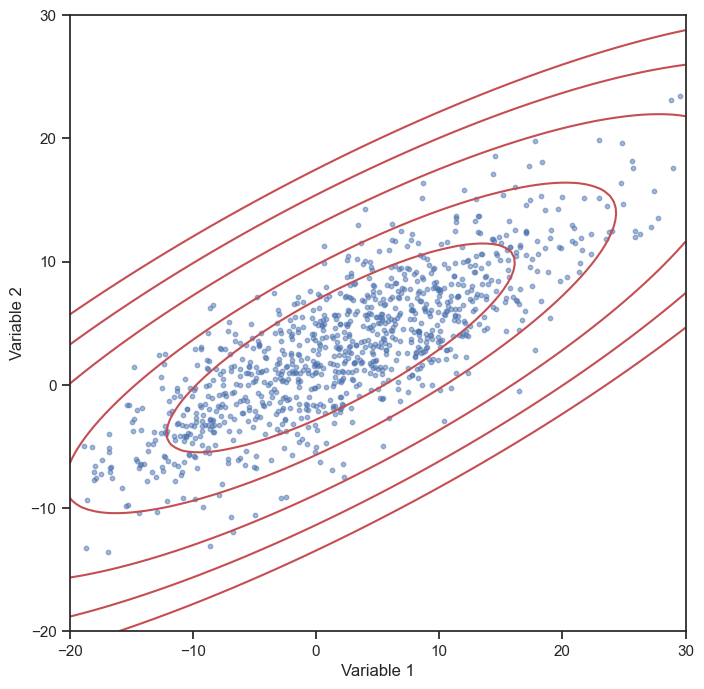

In [197]:
# <Vaš kôd ovdje>

mu = np.array([2, 3])
cov_matrix = np.array([
    [10**2, 7**2], 
    [7**2, 6**2]
])

X = np.random.multivariate_normal(mu, cov_matrix, size=1000)

# Set up plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.set_xlim([-20, 30])
ax.set_ylim([-20, 30])
ax.set_xlabel('Variable 1')
ax.set_ylabel('Variable 2')

# Plot scatter plot of the data
ax.scatter(X[:, 0], X[:, 1], s=10, alpha=0.5)

# Plot ellipses for different values of c2
for c2 in [2, 5, 10, 15, 20]:
    inv_cov = np.linalg.inv(cov_matrix)
    x, y = np.meshgrid(np.linspace(-20, 30, 100), np.linspace(-20, 30, 100))
    z = np.empty_like(x)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            d = np.array([x[i, j], y[i, j]]) - mu
            z[i, j] = d @ inv_cov @ d.T
    ax.contour(x, y, z, levels=[c2], colors='r')

plt.show()

/var/folders/l8/89z3g6t11j1cvs82n7wpclch0000gn/T/ipykernel_76688/1055388069.py:9: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(mu, cov_matrix, size=1000)


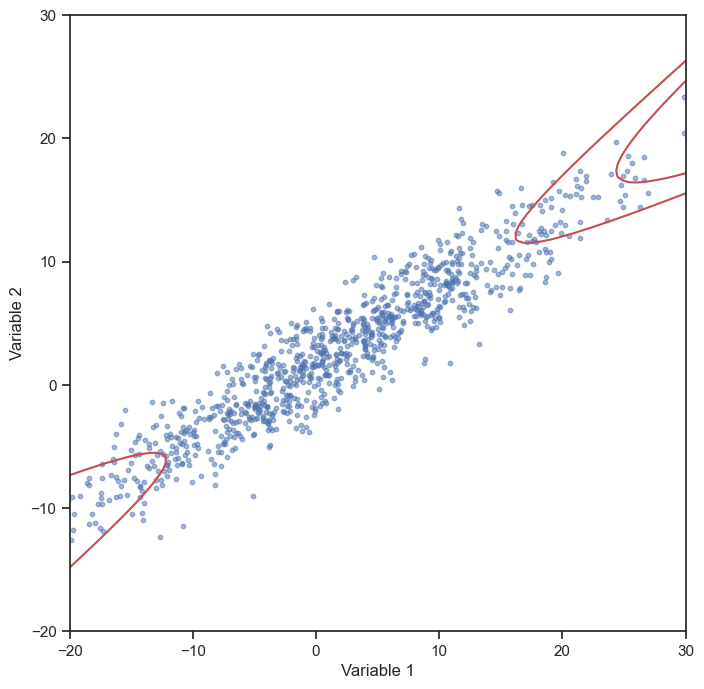

In [198]:
# <Vaš kôd ovdje>

mu = np.array([2, 3])
cov_matrix = np.array([
    [10**2, 8**2], 
    [8**2, 6**2]
])

X = np.random.multivariate_normal(mu, cov_matrix, size=1000)

# Set up plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
ax.set_xlim([-20, 30])
ax.set_ylim([-20, 30])
ax.set_xlabel('Variable 1')
ax.set_ylabel('Variable 2')

# Plot scatter plot of the data
ax.scatter(X[:, 0], X[:, 1], s=10, alpha=0.5)

# Plot ellipses for different values of c2
for c2 in [2, 5, 10, 15, 20]:
    inv_cov = np.linalg.inv(cov_matrix)
    x, y = np.meshgrid(np.linspace(-20, 30, 100), np.linspace(-20, 30, 100))
    z = np.empty_like(x)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            d = np.array([x[i, j], y[i, j]]) - mu
            z[i, j] = d @ inv_cov @ d.T
    ax.contour(x, y, z, levels=[c2], colors='r')

plt.show()

#### (c)

Promatramo $\mathbf{\Sigma}_1$ i $\mathbf{\Sigma}_2$ iz prošlog podzadatka. Neka su $\mathbf{X}_1 \sim \mathbf{\mathcal{N}}(\mathbf{\mu, \mathbf{\Sigma}_1)}$ i $\mathbf{X}_2 \sim \mathbf{\mathcal{N}}(\mathbf{\mu, \mathbf{\Sigma}_2)}$ slučajni dvo-dimenzionalni vektori, i neka je $\mathbf{X}_r$ slučajni vektor određen izrazom $\mathbf{X}_r = \mathbf{X}_1 - \mathbf{X}_2$. Odredite populacijske parametre koji određuju $\mathbf{X}_r \sim \mathbf{\mathcal{N}}(\mathbf{\mu}_r, \mathbf{\Sigma}_r)$.

In [204]:
# <Vaš kôd ovdje>

mu = np.array([2, 3])

cov_matrix1 = np.array([
    [10**2, 6**2], 
    [6**2, 10**2]
])

cov_matrix2 = np.array([
    [10**2, 7**2], 
    [7**2, 6**2]
])

X1 = np.random.multivariate_normal(mu, cov_matrix1, size=1000)
X2 = np.random.multivariate_normal(mu, cov_matrix2, size=1000)
Xr = X1 - X2


mu_Xr = np.mean(Xr.T)
print("\nmu Xr:\n", mu_Xr)

cov_Xr = np.cov(Xr.T).round(2)
print("\ncov Xr:\n", cov_Xr)


# using formula
cov_X1_X2 = np.cov(X1.T, X2.T)[0:2, 2:]
cov_Xr = cov_matrix1 + cov_matrix2 - 2 * cov_X1_X2
print("\ncov Xr:\n", cov_Xr)


mu Xr:
 0.3844623771985897

cov Xr:
 [[176.71  69.93]
 [ 69.93 134.03]]

cov Xr:
 [[189.6445569   79.09074579]
 [ 75.1207435  132.82472884]]


Procjenite iste te parametre uzorkovanjem $n=10^7$ opservacija iz $\mathbf{X_1}$ i $\mathbf{X_2}$.

In [207]:
# <Vaš kôd ovdje>

mu = np.array([2, 3])

cov_matrix1 = np.array([
    [10**2, 6**2], 
    [6**2, 10**2]
])

cov_matrix2 = np.array([
    [10**2, 7**2], 
    [7**2, 6**2]
])

n = 10**7

X1 = np.random.multivariate_normal(mu, cov_matrix1, size=n)
X2 = np.random.multivariate_normal(mu, cov_matrix2, size=n)
Xr = X1 - X2


mu_Xr = np.mean(Xr.T).round(2)
print("\nmu Xr:\n", mu_Xr)

cov_Xr = np.cov(Xr.T).round(2)
print("\ncov Xr:\n", cov_Xr)


# using formula
cov_X1_X2 = np.cov(X1.T, X2.T)[0:2, 2:]
cov_Xr = cov_matrix1 + cov_matrix2 - 2 * cov_X1_X2
print("\ncov Xr:\n", cov_Xr.round(2))


mu Xr:
 -0.0

cov Xr:
 [[200.1   85.07]
 [ 85.07 136.  ]]

cov Xr:
 [[200.09  85.07]
 [ 85.1  136.01]]


Procjenite parametre procjenitelja $\overline{\mathbf{X}}_r \sim \mathbf{\mathcal{N}}(\mathbf{\mu}_1, (1/n)\mathbf{\Sigma}_1)$ uzorkovanjem iz $\mathbf{X_1}$ i $\mathbf{X_2}$ na sljedeći način: generirajte $K = 10^5$ uzoraka, gdje svaki uzorak ima $n = 100$ opservacija.

In [ ]:
# <Vaš kôd ovdje>

K = 10**5
n = 100

mu = np.array([2, 3])

### 3. Statističko zaključivanje

Generirajte uzorak $\mathbf{X} \in \mathbb{R}^{1000x2}$ iz multivarijatne normalne razdiobe s parametrima:

$$
\mathbf{\mu} = [2, 3],
\mathbf{\Sigma} = 
\begin{bmatrix}
10^2 & 7^2 \\
7^2 & 6^2 \\
\end{bmatrix}
$$

In [ ]:
# <Vaš kôd ovdje>

#### (a)

Implementirajte funkciju za određivanje *Hotellingove $T^2$* statistike.

In [ ]:
# <Vaš kôd ovdje>

Za generirani uzorak testirajte hiptezu $H_0: \mathbf{\mu}= [2, 3]$ naspram $H_1: \mathbf{\mu} \neq [2, 3]$ za razinu značajnosti $\alpha = 0.05$.

In [ ]:
# <Vaš kôd ovdje>

#### (b)

Za generirani uzorak, prikažite na grafu $95\%$-tno područje pouzdanosti za $\mathbf{\mu}$ razdiobe.

In [ ]:
# <Vaš kôd ovdje>

#### (c)

Uz pomoć simultanih intervala pouzdanosti ($T^2$-interval), odredite $95\%$-tno područje pouzdanosti za srednje vrijednosti varijabli, $\mu_1$ i $\mu_2$, te njihovu razliku $\mu_2 - \mu_1$.

In [ ]:
# <Vaš kôd ovdje>

Izračunajte univarijatni $t$-interval pouzdanosti za srednju vrijednost svake varijable, a zatim i Bonferronijevu korekciju $t$-intervala. Usporedite s rezultatima dobivenim pomoću $T^2$-intervala.

In [ ]:
# <Vaš kôd ovdje>

Izračunajte $\tilde{\chi}^2$ interval pouzdanosti za velike uzorke za srednju vrijednost svake varijable. Usporedite dobivenu vrijednost s prethodno dobivenim vrijednostima.

In [ ]:
# <Vaš kôd ovdje>

U idućem zadatku ćete provesti ostatak naučenih metoda vezano uz statističko zaključivanje o više vektora sredine.

### 4. Primjena implementiranih metoda

Učitajte podatkovni skup [*iris*](https://archive.ics.uci.edu/ml/datasets/Iris) (postoji mogućnost i učitavanja unutar jezika - [Python](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) / [R](https://technicaljockey.com/r-programming-training/loading-iris-data-set-in-r/)).

In [113]:
# <Vaš kôd ovdje>
iris = load_iris()

Procijenite parametre $\mathbf{\mu},\mathbf{\Sigma}$ vezane uz 4 numeričke varijable.

In [114]:
# <Vaš kôd ovdje>
X = iris.data[:, :4]

mu = np.mean(X, axis=0).round(2)

cov_matrix = np.cov(X.T).round(2)

print("\nsredina:\n", mu)
print("\nkovarijacijska matrica:\n", cov_matrix)


sredina:
 [5.84 3.06 3.76 1.2 ]

kovarijacijska matrica:
 [[ 0.69 -0.04  1.27  0.52]
 [-0.04  0.19 -0.33 -0.12]
 [ 1.27 -0.33  3.12  1.3 ]
 [ 0.52 -0.12  1.3   0.58]]


Provedite analizu normalnosti 4 numeričkih varijabli. Ukoliko je potrebno, predložite koje transformacije biste radili na podatcima kako biste ojačali pretpostavke normalnosti u skupu. 

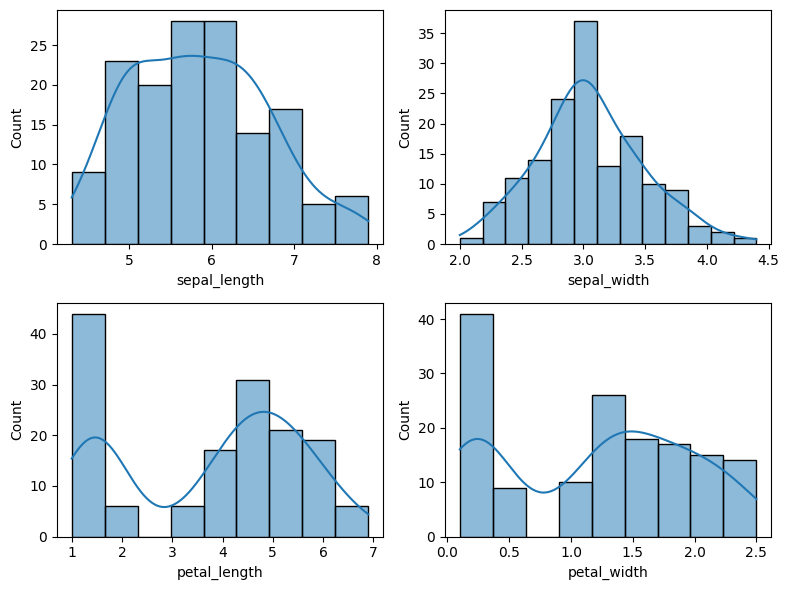

In [116]:
# <Vaš kôd ovdje>

iris = sns.load_dataset('iris')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
sns.histplot(data=iris, x='sepal_length', kde=True, ax=axes[0, 0])
sns.histplot(data=iris, x='sepal_width', kde=True, ax=axes[0, 1])
sns.histplot(data=iris, x='petal_length', kde=True, ax=axes[1, 0])
sns.histplot(data=iris, x='petal_width', kde=True, ax=axes[1, 1])

plt.tight_layout()
plt.show()

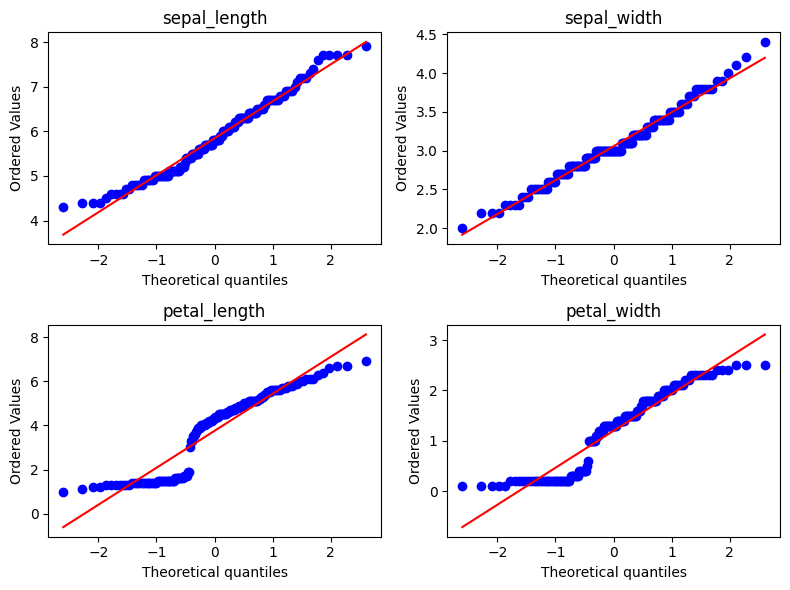

In [125]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

for i, var in enumerate(iris.columns[:-1]):
    row = i // 2
    col = i % 2
    stats.probplot(iris[var], plot=axes[row, col])
    axes[row, col].set_title(var)

plt.tight_layout()
plt.show()

Provedite detekciju stršećih vrijednosti (vizualno/numerički).

**Hint**: Poglavlje 4.7 (Johnson)

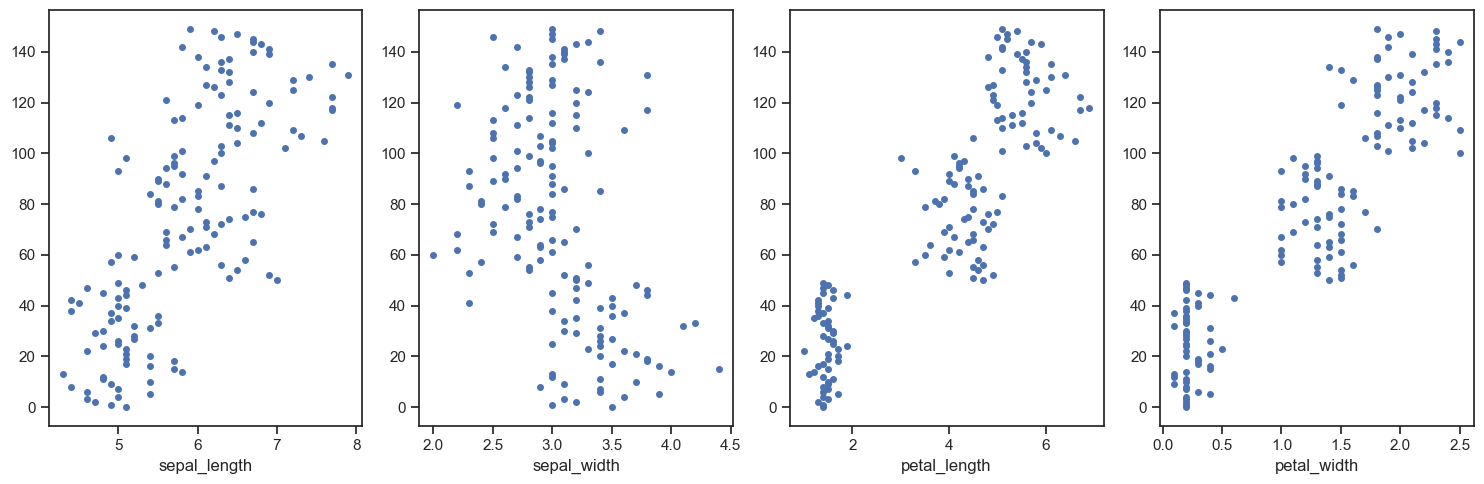

In [129]:
# <Vaš kôd ovdje>

# Make a dot plot for each variable
fig, axs = plt.subplots(ncols=4, figsize=(15, 5))

# Create a dot plot for each variable
for i, col in enumerate(iris.columns[:-1]):
    axs[i].plot(iris[col], range(len(iris)), 'o', markersize=4)
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()

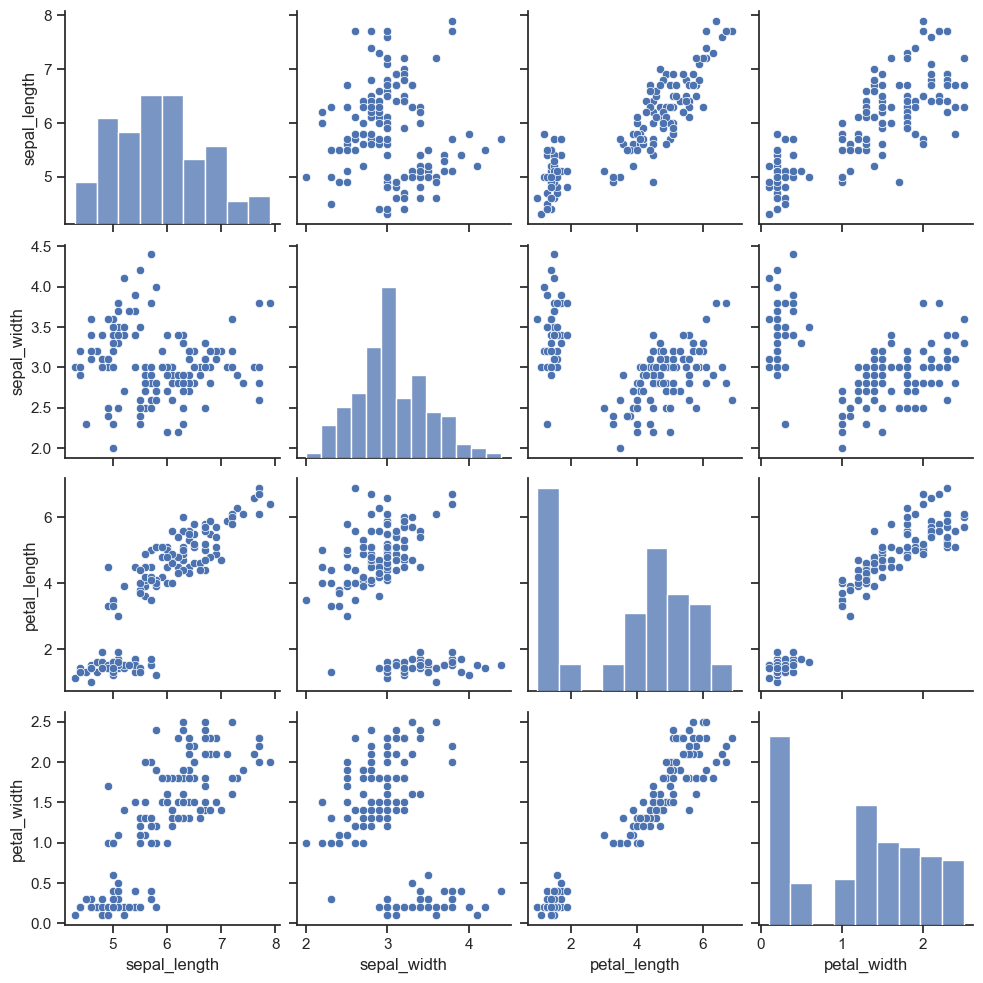

In [130]:
# Make a scatter plot for each pair of variables.
sns.pairplot(data=iris, kind='scatter', diag_kind='hist')

In [167]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

iris = iris.drop(columns=['class'])

iris_std = (iris - iris.mean()) / iris.std()


iris_std_sepal_length = iris_std[(iris_std['sepal_length'] > 2) | (iris_std['sepal_length'] < -2)]['sepal_length']
print("\nsepal_length:\n", iris_std_sepal_length)


iris_std_sepal_width = iris_std[(iris_std['sepal_width'] > 2) | (iris_std['sepal_width'] < -2)]['sepal_width']
print("\nsepal_width:\n", iris_std_sepal_width)


iris_std_petal_length = iris_std[(iris_std['petal_length'] > 2) | (iris_std['petal_length'] < -2)]['petal_length']
print("\npetal_length:\n", iris_std_petal_length)


iris_std_petal_width = iris_std[(iris_std['petal_width'] > 2) | (iris_std['petal_width'] < -2)]['petal_width']
print("\npetal_width:\n", iris_std_petal_width)


sepal_length:
 105    2.121409
117    2.242172
118    2.242172
122    2.242172
131    2.483699
135    2.242172
Name: sepal_length, dtype: float64

sepal_width:
 14    2.181763
15    3.104284
32    2.412393
33    2.643024
60   -2.430844
Name: sepal_width, dtype: float64

petal_length:
 Series([], Name: petal_length, dtype: float64)

petal_width:
 Series([], Name: petal_width, dtype: float64)


Odredite $95\%$-tno područje pouzdanosti za srednje vrijednosti varijabli.

**Hint**: Prethodno implementirani $T^2$-interval/ $t$-interval/ Bonferroni

In [179]:
# <Vaš kôd ovdje>

# TODO

Razmatramo *species: virginica* populaciju. Razlikuju li se  *sepal* __length__ i __width__ varijable od *petal* __length__ i __width__ varijabli (duljina i širina sepala i papučica - dijelovi reproduktivnog sustava cvijeta)?

**Hint**: Metoda uparenih usporedbi

In [191]:
# <Vaš kôd ovdje>
from scipy.stats import ttest_rel

iris = sns.load_dataset('iris')

virginica = iris.loc[iris.species == 'virginica']

# TODO ovo nekako drugacije
"""
Razmatramo species: virginica populaciju. Razlikuju li se sepal length i width varijable od petal length i width varijabli (duljina i širina sepala i papučica - dijelovi reproduktivnog sustava cvijeta)?
kak ste ovo napravili
ja sam oduzeo lengthove i widthove
i napravio vektor razlika
i onda na tome izracuano Hotellingovu statistiku
"""


sl_pl = ttest_rel(virginica.sepal_length, virginica.petal_length, alternative='greater')
print(f"Sepal length vs petal length: t-value = {sl_pl.statistic}, p-value = {sl_pl.pvalue}")


sw_pw = ttest_rel(virginica.sepal_width, virginica.petal_width)
print(f"Sepal width vs petal width: t-value = {sw_pw.statistic}, p-value = {sw_pw.pvalue}")

# p je puno manji od 0.05 -> razlikuju se

Sepal length vs petal length: t-value = 22.8980589536387, p-value = 3.9926297425158056e-28
Sepal width vs petal width: t-value = 23.104146605753257, p-value = 5.339057365526556e-28


Usporedite vektore srednjih vrijednosti za sve varijable između svih *species* populacija. Postoji li statistički značajna razlika?

**Hint**: MANOVA

In [174]:
# <Vaš kôd ovdje>
from statsmodels.multivariate.manova import MANOVA

iris = sns.load_dataset('iris')

maov = MANOVA.from_formula('sepal_length + sepal_width + petal_length + petal_width ~ species', data=iris)
result = maov.mv_test()


print(result.summary())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0170 4.0000 144.0000 2086.7720 0.0000
         Pillai's trace  0.9830 4.0000 144.0000 2086.7720 0.0000
 Hotelling-Lawley trace 57.9659 4.0000 144.0000 2086.7720 0.0000
    Roy's greatest root 57.9659 4.0000 144.0000 2086.7720 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
        species          Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0234 8.0000 288.0000  199.1453 0.0000
         Pillai's trace  1.1919 8.0000 290.00

**Bonus**: Postoji li dodatno istraživačko pitanje koje želite testirati?

In [178]:
# <Vaš kôd ovdje>

# Razlikuju li se sepal length i width varijable od petal length i width varijabli u populaciji setosa

from scipy.stats import ttest_rel

iris = sns.load_dataset('iris')

setosa = iris.loc[iris.species == 'setosa']


sl_pl = ttest_rel(setosa.sepal_length, setosa.petal_length)
print(f"Sepal length vs petal length: t-value = {sl_pl.statistic}, p-value = {sl_pl.pvalue}")


sw_pw = ttest_rel(setosa.sepal_width, setosa.petal_width)
print(f"Sepal width vs petal width: t-value = {sw_pw.statistic}, p-value = {sw_pw.pvalue}")

# p je puno manji od 0.05 -> razlikuju se

Sepal length vs petal length: t-value = 71.8351607078693, p-value = 2.542886540130379e-51
Sepal width vs petal width: t-value = 60.967252469790076, p-value = 7.212365087348317e-48
